## Random Forest Classifier

In [1]:
pathToData = '../DATA/'
pathToEvaluations = '../EVALUATIONS/'

In [2]:
import pandas as pd

X_train = pd.read_csv(pathToData + 'X_train.csv', index_col=0)
y_train = pd.read_csv(pathToData + 'y_train.csv', index_col=0)
X_test = pd.read_csv(pathToData + 'X_test.csv', index_col=0)
y_test = pd.read_csv(pathToData + 'y_test.csv', index_col=0)

In [3]:
from sklearn import ensemble
from sklearn.metrics import precision_recall_fscore_support

PRFS_array = []
n_range = range(1, 201, 5)

for n in n_range: # originally tester to 201, swapped to decrease overall runtime for file
    clf = ensemble.RandomForestClassifier(n_estimators=n, class_weight="balanced")
    clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)

    PRFS_score = precision_recall_fscore_support(y_test, Y_predTest)
    PRFS_array.append(PRFS_score)

/tmp/ipykernel_31753/3811095264.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
/tmp/ipykernel_31753/3811095264.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
/tmp/ipykernel_31753/3811095264.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
/tmp/ipykernel_31753/3811095264.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
/tmp/ipykernel_31753/3811095264.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expect

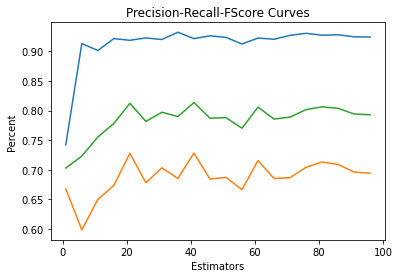

In [4]:
#Used to determine optimal n_estimators for the RandomForest to prevent overfitting
#Elbow at 50

limiter = 20
n_range_limited = n_range[:limiter]
n_precision = [x[0][1] for x in PRFS_array][:limiter]
n_recall = [x[1][1] for x in PRFS_array][:limiter]
n_fscore = [x[2][1] for x in PRFS_array][:limiter]

import matplotlib.pyplot as plt
plt.plot(n_range_limited, n_precision, label="Precision")
plt.plot(n_range_limited, n_recall, label="Recall")
plt.plot(n_range_limited, n_fscore, label="FScore")
plt.xlabel("Estimators")
plt.ylabel("Percent")
plt.title("Precision-Recall-FScore Curves")
plt.show()

In [5]:
clf = ensemble.RandomForestClassifier(n_estimators=40, class_weight="balanced")
clf.fit(X_train, y_train)

/tmp/ipykernel_31753/3603211689.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=40)

In [6]:
import pickle
with open(pathToEvaluations + 'RandomForest.model', 'wb') as file:
    pickle.dump(clf, file)